<a href="https://colab.research.google.com/github/shanmukh2325/Shanmukha_INFO5731_-Fall2023/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [19]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
import pandas as pd
from nltk import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize
import re
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Extract the 'Content' column
reviews = df['Content'].astype(str)

# Function to preprocess text (remove special characters, convert to lowercase)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower()

# Tokenize and preprocess the reviews
tokenized_reviews = [word_tokenize(preprocess_text(review)) for review in reviews]

# Function to get N-grams and count their frequency
def get_ngram_frequency(tokenized_text, n):
    ngrams_list = list(ngrams(tokenized_text, n))
    # Join each n-gram to a string for counting
    ngrams_strings = [' '.join(map(str, gram)) for gram in ngrams_list]
    return Counter(ngrams_strings)

# Count the frequency of N-grams (N=3)
ngram_frequency = get_ngram_frequency(tokenized_reviews, 3)

# Display the top 10 most common N-grams
print("Top 10 most common 3-grams:")
for ngram, frequency in ngram_frequency.most_common(10):
    print(f"{ngram}: {frequency}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 most common 3-grams:
['i', 'have', 'seen', 'a', 'lot', 'of', 'movies', 'in', 'my', 'time', 'made', 'in', 'a', 'lot', 'of', 'different', 'styles', 'from', 'different', 'genres', 'from', 'all', 'around', 'the', 'world', 'ive', 'seen', 'everything', 'from', 'the', 'most', 'mainstream', 'movie', 'imaginable', 'to', 'the', 'most', 'experimental', 'i', 'cant', 'even', 'remember', 'the', 'last', 'time', 'i', 'came', 'away', 'from', 'a', 'movie', 'thinking', 'that', 'id', 'never', 'seen', 'anything', 'like', 'it', 'but', 'thats', 'how', 'i', 'felt', 'after', 'rrrthis', 'movie', 'is', 'so', 'much', 'its', 'muchness', 'may', 'be', 'a', 'turn', 'off', 'to', 'some', 'and', 'almost', 'was', 'for', 'me', 'my', 'wife', 'and', 'i', 'nearly', 'bailed', 'at', 'the', '20', 'minute', 'mark', 'because', 'the', 'film', 'is', 'so', 'over', 'the', 'top', 'and', 'ridiculous', 'but', 'we', 'got', 'hooked', 'and', 'then', 'i', 'was', 'totally', 'in', 'for', 'the', 'ride', 'to', 'the', 'point', 'where', 'i

In [30]:
import pandas as pd
from nltk import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize
import re
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Extract the 'Content' column
reviews = df['Content'].astype(str)

# Function to preprocess text (remove special characters, convert to lowercase)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower()

# Tokenize and preprocess the reviews
tokenized_reviews = [word_tokenize(preprocess_text(review)) for review in reviews]

# Function to get bigrams and count their frequency
def get_bigram_frequency(tokenized_text):
    bigrams_list = list(ngrams(tokenized_text, 2))
    return Counter(bigrams_list)

# Count the frequency of bigrams
bigram_frequency = get_bigram_frequency([tuple(gram) for review in tokenized_reviews for gram in review])

# Calculate and print the top 100 probabilities for bigrams
print("Top 100 probabilities for bigrams:")
count = 0
for bigram, freq in bigram_frequency.most_common():
    w1, w2 = bigram
    w1_count = sum(1 for review in tokenized_reviews if w1 in review)
    if w1_count != 0:
        probability = freq / w1_count
        print(f"P({w2} | {w1}) = {probability:.2f}")
    else:
        print(f"P({w2} | {w1}) = Undefined (denominator is zero)")
    count += 1
    if count == 100:
        break


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 100 probabilities for bigrams:
P(('t', 'h', 'e') | ('o', 'f')) = Undefined (denominator is zero)
P(('t', 'h', 'e') | ('i', 'n')) = Undefined (denominator is zero)
P(('m', 'o', 'v', 'i', 'e') | ('t', 'h', 'i', 's')) = Undefined (denominator is zero)
P(('t', 'h', 'e') | ('t', 'o')) = Undefined (denominator is zero)
P(('f', 'i', 'l', 'm') | ('t', 'h', 'e')) = Undefined (denominator is zero)
P(('i', 's') | ('t', 'h', 'i', 's')) = Undefined (denominator is zero)
P(('t', 'h', 'e') | ('i', 's')) = Undefined (denominator is zero)
P(('b', 'e') | ('t', 'o')) = Undefined (denominator is zero)
P(('w', 'a', 's') | ('i',)) = Undefined (denominator is zero)
P(('i', 's') | ('r', 'r', 'r')) = Undefined (denominator is zero)
P(('c', 'h', 'a', 'r', 'a', 'n') | ('r', 'a', 'm')) = Undefined (denominator is zero)
P(('m', 'o', 's', 't') | ('t', 'h', 'e')) = Undefined (denominator is zero)
P(('a',) | ('i', 's')) = Undefined (denominator is zero)
P(('t', 'o') | ('g', 'o', 'i', 'n', 'g')) = Undefined (denom

In [34]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Extract the 'Content' column
reviews = df['Content'].astype(str)

# Function to preprocess text (remove special characters, convert to lowercase)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower()

# Tokenize and preprocess the reviews
tokenized_reviews = [word_tokenize(preprocess_text(review)) for review in reviews]

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to extract noun phrases from a sentence
def extract_noun_phrases(sentence):
    tagged_words = nltk.pos_tag(sentence)
    noun_phrases = []
    current_noun_phrase = []

    for word, pos in tagged_words:
        if pos.startswith('N') or pos == 'PRP$':
            current_noun_phrase.append(word)
        elif current_noun_phrase:
            noun_phrases.append(tuple(current_noun_phrase))
            current_noun_phrase = []

    if current_noun_phrase:
        noun_phrases.append(tuple(current_noun_phrase))

    return noun_phrases

# Function to calculate relative probabilities of each review
def calculate_relative_probabilities(reviews):
    # Create a Counter for all noun phrases
    all_noun_phrases = Counter()

    # Iterate through each review
    for review in reviews:
        # Extract noun phrases from the review
        review_noun_phrases = extract_noun_phrases(review)

        # Update the Counter with the noun phrases from the current review
        all_noun_phrases.update(review_noun_phrases)

    # Get the top 100 noun phrases based on frequency
    top_noun_phrases = [noun_phrase for noun_phrase, _ in all_noun_phrases.most_common(100)]

    # Create a table with columns as noun phrases and rows as reviews
    table_data = {}
    for i, review in enumerate(reviews):
        # Extract noun phrases from the review
        review_noun_phrases = extract_noun_phrases(review)

        # Calculate relative frequency for each top noun phrase in the current review
        relative_frequencies = {noun_phrase: count / all_noun_phrases[noun_phrase] for noun_phrase, count in all_noun_phrases.items() if noun_phrase in top_noun_phrases}

        # Update the table with relative frequencies for the current review
        table_data[f"Review {i + 1}"] = relative_frequencies

    # Create a DataFrame from the table data
    df_table = pd.DataFrame(table_data).transpose()

    return df_table

# Calculate relative probabilities and print the table
relative_probabilities_table = calculate_relative_probabilities(tokenized_reviews)
print(relative_probabilities_table)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


               i lot movies world time anything movie   my film point  ...  \
             NaN NaN    NaN   NaN    i      NaN   NaN wife  NaN   NaN  ...   
Review 1     NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 2     NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 3     NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 4     NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 5     NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
...           ..  ..    ...   ...  ...      ...   ...  ...  ...   ...  ...   
Review 9996  NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 9997  NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 9998  NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 9999  NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN   NaN  ...   
Review 10000 NaN NaN    NaN   NaN  1.0      NaN   NaN  1.0  NaN 

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [35]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Extract the 'Content' column
documents = df['Content'].astype(str)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for the TF-IDF matrix
df_tfidf = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Print the TF-IDF matrix
print(df_tfidf)




            10  187     1920s      1963        20      2001      2017  \
0     0.000000  0.0  0.000000  0.000000  0.110949  0.000000  0.000000   
1     0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...  ...       ...       ...       ...       ...       ...   
9995  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
9996  0.022617  0.0  0.030553  0.036551  0.000000  0.036551  0.030553   
9997  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
9998  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
9999  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

          2022      20th   30  ...  wow   writing     wrong  wrote  year  \
0     0.000000  0.000000  0.0  ...  0.0  0.0000

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Extract the 'Content' column
documents = df['Content'].astype(str)

# Add the query to the documents
query = "An Outstanding movie with a haunting performance and best character development"
documents = documents.append(pd.Series([query]), ignore_index=True)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Calculate cosine similarity between the query and documents
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Get the similarity scores and sort the documents based on similarity
similarity_scores = cosine_similarities[0]
ranked_documents = df.assign(Similarity=similarity_scores).sort_values(by='Similarity', ascending=False)

# Display the ranked documents
print(ranked_documents[['Content', 'Similarity']])

<ipython-input-36-d5c95116d9f8>:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  documents = documents.append(pd.Series([query]), ignore_index=True)


                                                Content  Similarity
7276  I bet you'd never think the mash-up the heavy-...    0.124208
2976  I bet you'd never think the mash-up the heavy-...    0.124208
5951  I bet you'd never think the mash-up the heavy-...    0.124208
4476  I bet you'd never think the mash-up the heavy-...    0.124208
9276  I bet you'd never think the mash-up the heavy-...    0.124208
...                                                 ...         ...
6433  It strikes me that in recent times not many fi...    0.000000
283   It strikes me that in recent times not many fi...    0.000000
1883  It strikes me that in recent times not many fi...    0.000000
4958  It strikes me that in recent times not many fi...    0.000000
7383  It strikes me that in recent times not many fi...    0.000000

[10000 rows x 2 columns]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

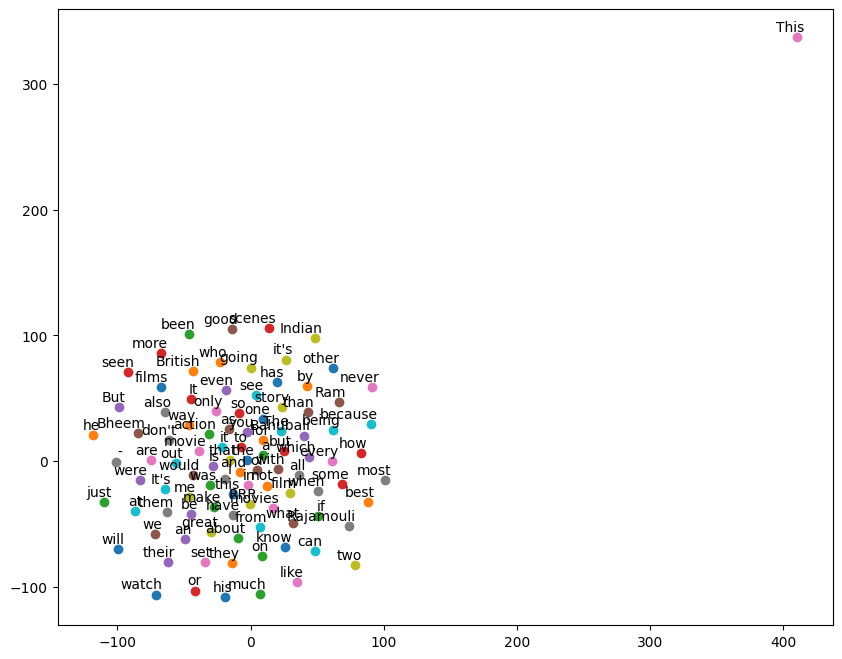

In [38]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Extract the 'Content' column
documents = df['Content'].astype(str)

# Tokenize the documents
tokenized_documents = [doc.split() for doc in documents]

# Train a Word2Vec model
embedding_dim = 300
word2vec_model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Save the trained model (optional)
word2vec_model.save('word2vec_model.model')

# Visualize the word embeddings using t-SNE
def plot_embeddings(model, num_words=100):
    words = list(model.wv.index_to_key)[:num_words]
    vectors = np.array([model.wv[word] for word in words])

    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i in range(num_words):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
        plt.annotate(words[i], xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')

    plt.show()

# Visualize the embeddings
plot_embeddings(word2vec_model)


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [42]:
# The GitHub link of your final csv file

# Link: https://github.com/shanmukh2325/Shanmukha_INFO5731_-Fall2023/blob/main/Annotated_dataset.csv
